#**1. DATA ACQUISITION**

pada tahap ini, fokus kita adalah mengumpulkan data mentah yang akan kita olah dan kita analisis untuk digunakan menjadi sebuah model.

model yang akan dibuat yaitu, "Prediksi Harga Jual Kendaraan" dengan dataset yang digunakan melibatkan beberapa fitur utama seperti profil kendaraan.

Kumpulan data ini berisi rincian kendaraan seperti merek, tahun produksi, jarak tempuh, jenis bahan bakar, tipe seller, transmisi, jumlah kepemilikan mobil sebelumnya. Variabel target dalam kasus ini adalah harga kendaraan, yang merupakan variabel numerik yang mencerminkan nilai kendaraan tersebut.

Variabel-variabel fitur ini akan diproses dan digunakan untuk membangun model machine learning regresi. Model ini akan digunakan untuk memprediksi harga kendaraan berdasarkan karakteristik yang dimiliki oleh setiap kendaraan dalam dataset.

Dalam hal ini, kita akan berfokus pada pengukuran metrik bisnis yang sesuai dengan permasalahan ini. Salah satu metrik yang relevan adalah "Root Mean Squared Error (RMSE)" yang mengukur seberapa akurat model dalam memprediksi harga kendaraan. Selain itu, kita juga dapat menggunakan metrik bisnis lain seperti "Mean Absolute Error (MAE)" untuk memberikan gambaran yang lebih lengkap tentang seberapa baik model ini dalam memprediksi harga kendaraan.

Dengan menggunakan metrik bisnis ini, kita dapat mengukur seberapa baik model ini dalam melakukan prediksi harga kendaraan, yang dapat sangat bermanfaat dalam industri penjualan kendaraan seperti otomotif. Semakin rendah nilai RMSE atau MAE, semakin baik model ini dalam memprediksi harga kendaraan, yang dapat membantu perusahaan atau individu yang terlibat dalam penjualan kendaraan untuk membuat keputusan yang lebih baik.

In [176]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [177]:
import pandas as pd

In [178]:
#membaca dataset
df=pd.read_csv('car data.csv')

In [179]:
#mengecek dimensi dataset
df.shape

(301, 9)

hasil diatas memperlihatkan bahwa dataset yang digunakan terdiri dari 301 baris dan 9 colomuns

In [180]:
#menampilkan 5 data teratas
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#**2. DATA EXPLORATION**

Pada tahapan ini, kita akan mencoba memahami karakteristik dari sebuah dataset yang kita gunakan, seperti melihat nilai unik, mendeteksi data kosong, serta menganalisis hubungan antar variabel.

In [181]:
#melihat nilai unik(kategori) dari setiap kolom dalam dataset untuk memahami jenis data terutama pada kolom kategori(bukan angka)
print(df['Seller_Type'].unique()) #mengambil kolom Seller_type dan menampilkan semua nilai berbeda (tidak duplikat) yang muncul pada kolom itu.
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [182]:
##check missing values
#Mengecek dan menghitung jumlah data yang hilang di tiap kolom
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Semua kolom memiliki nilai 0, berarti tidak ada data yang hilang (complete dataset).

In [183]:
#melihat sebaran data dan mendeteksi nilai yang tidak wajar (outlier).
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [184]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [185]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [186]:
#menambahkan kolom baru bernama Current Year dengan nilai 2020
final_dataset['Current Year']=2020

In [187]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [188]:
#membuat kolom baru bernama 'no_year'
#digunakan untuk menghitung hasil pengurangan antara tahun sekarang dan tahun mobil dibuat.
#tujuannya untuk menghitung umur mobil dalam hitungan satuan tahun
#Semakin besar nilai no_year, berarti mobil tersebut lebih tua.
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

Contoh implementasi sederhana
| Year | Current Year | Hasil `no_year` |
| ---- | ------------ | --------------- |
| 2015 | 2020         | 5               |
| 2018 | 2020         | 2               |
| 2010 | 2020         | 10              |

Hasil:
- mobil tahun 2015 umurnya 5 tahun
- mobil tahun 2018 umurnya 2 tahun
- mobil tahun 2010 umurnya 10 tahun

dalam proses ini, Umur mobil adalah fitur penting dalam prediksi harga jual. Mobil yang lebih tua biasanya dijual dengan harga lebih murah, jadi fitur ini membantu model machine learning memahami hubungan antara usia dan harga mobil.


In [189]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [190]:
#menghapus informasi pada kolom 'Year' yang sudah terwakili oleh kolom baru 'no_year'
final_dataset.drop(['Year'],axis=1,inplace=True)

In [191]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [192]:
#Proses One-Hot Encoding
#mengubah data kategori(teks) menjadi data angka/numerik
final_dataset=pd.get_dummies(final_dataset,drop_first=True).astype(int)

In [193]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,2020,6,0,1,0,1
1,4,9,43000,0,2020,7,1,0,0,1
2,7,9,6900,0,2020,3,0,1,0,1
3,2,4,5200,0,2020,9,0,1,0,1
4,4,6,42450,0,2020,6,1,0,0,1


In [194]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,2020,6,0,1,0,1
1,4,9,43000,0,2020,7,1,0,0,1
2,7,9,6900,0,2020,3,0,1,0,1
3,2,4,5200,0,2020,9,0,1,0,1
4,4,6,42450,0,2020,6,1,0,0,1


In [195]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)

In [196]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,6,0,1,0,1
1,4,9,43000,0,7,1,0,0,1
2,7,9,6900,0,3,0,1,0,1
3,2,4,5200,0,9,0,1,0,1
4,4,6,42450,0,6,1,0,0,1


In [197]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.877518,0.032597,-0.083877,-0.229302,0.547371,-0.535179,-0.542332,-0.367935
Present_Price,0.877518,1.000000,0.206896,0.007089,0.049269,0.472090,-0.464390,-0.515092,-0.349275
Kms_Driven,0.032597,0.206896,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.083877,0.007089,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.229302,0.049269,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.547371,0.472090,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.535179,-0.464390,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.542332,-0.515092,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367935,-0.349275,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [198]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [199]:
import seaborn as sns

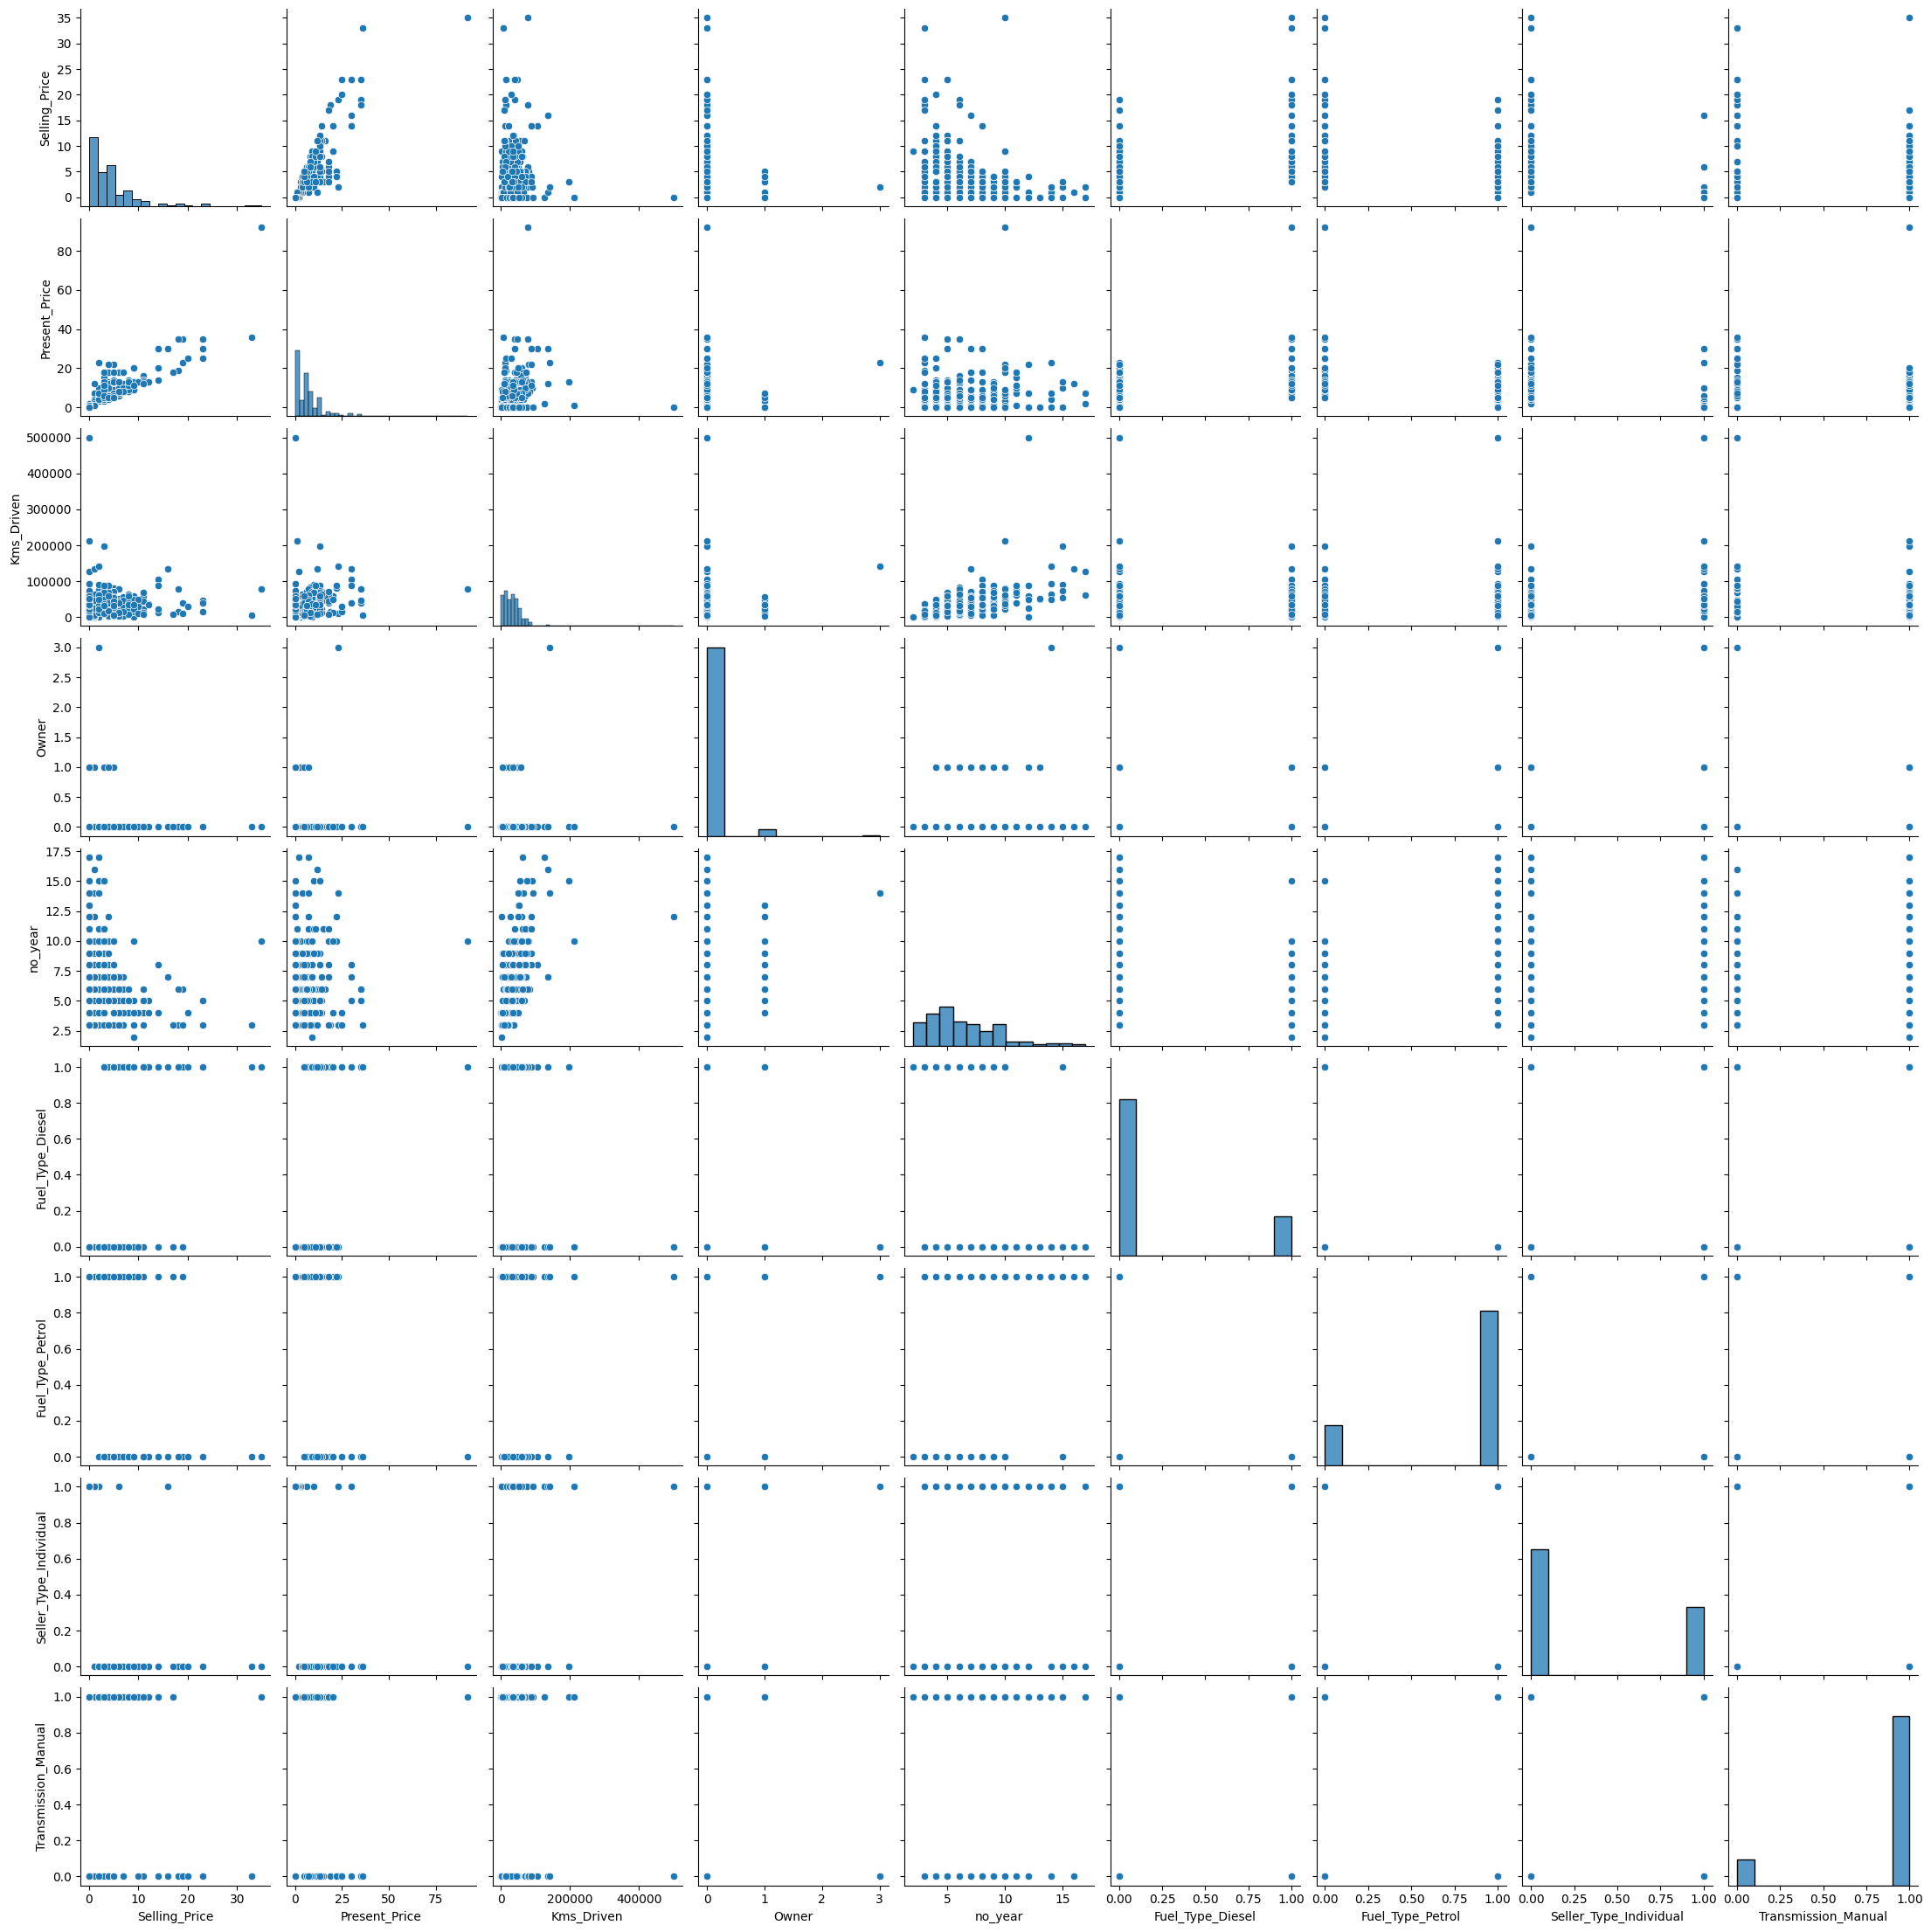

In [200]:
sns.pairplot(final_dataset)

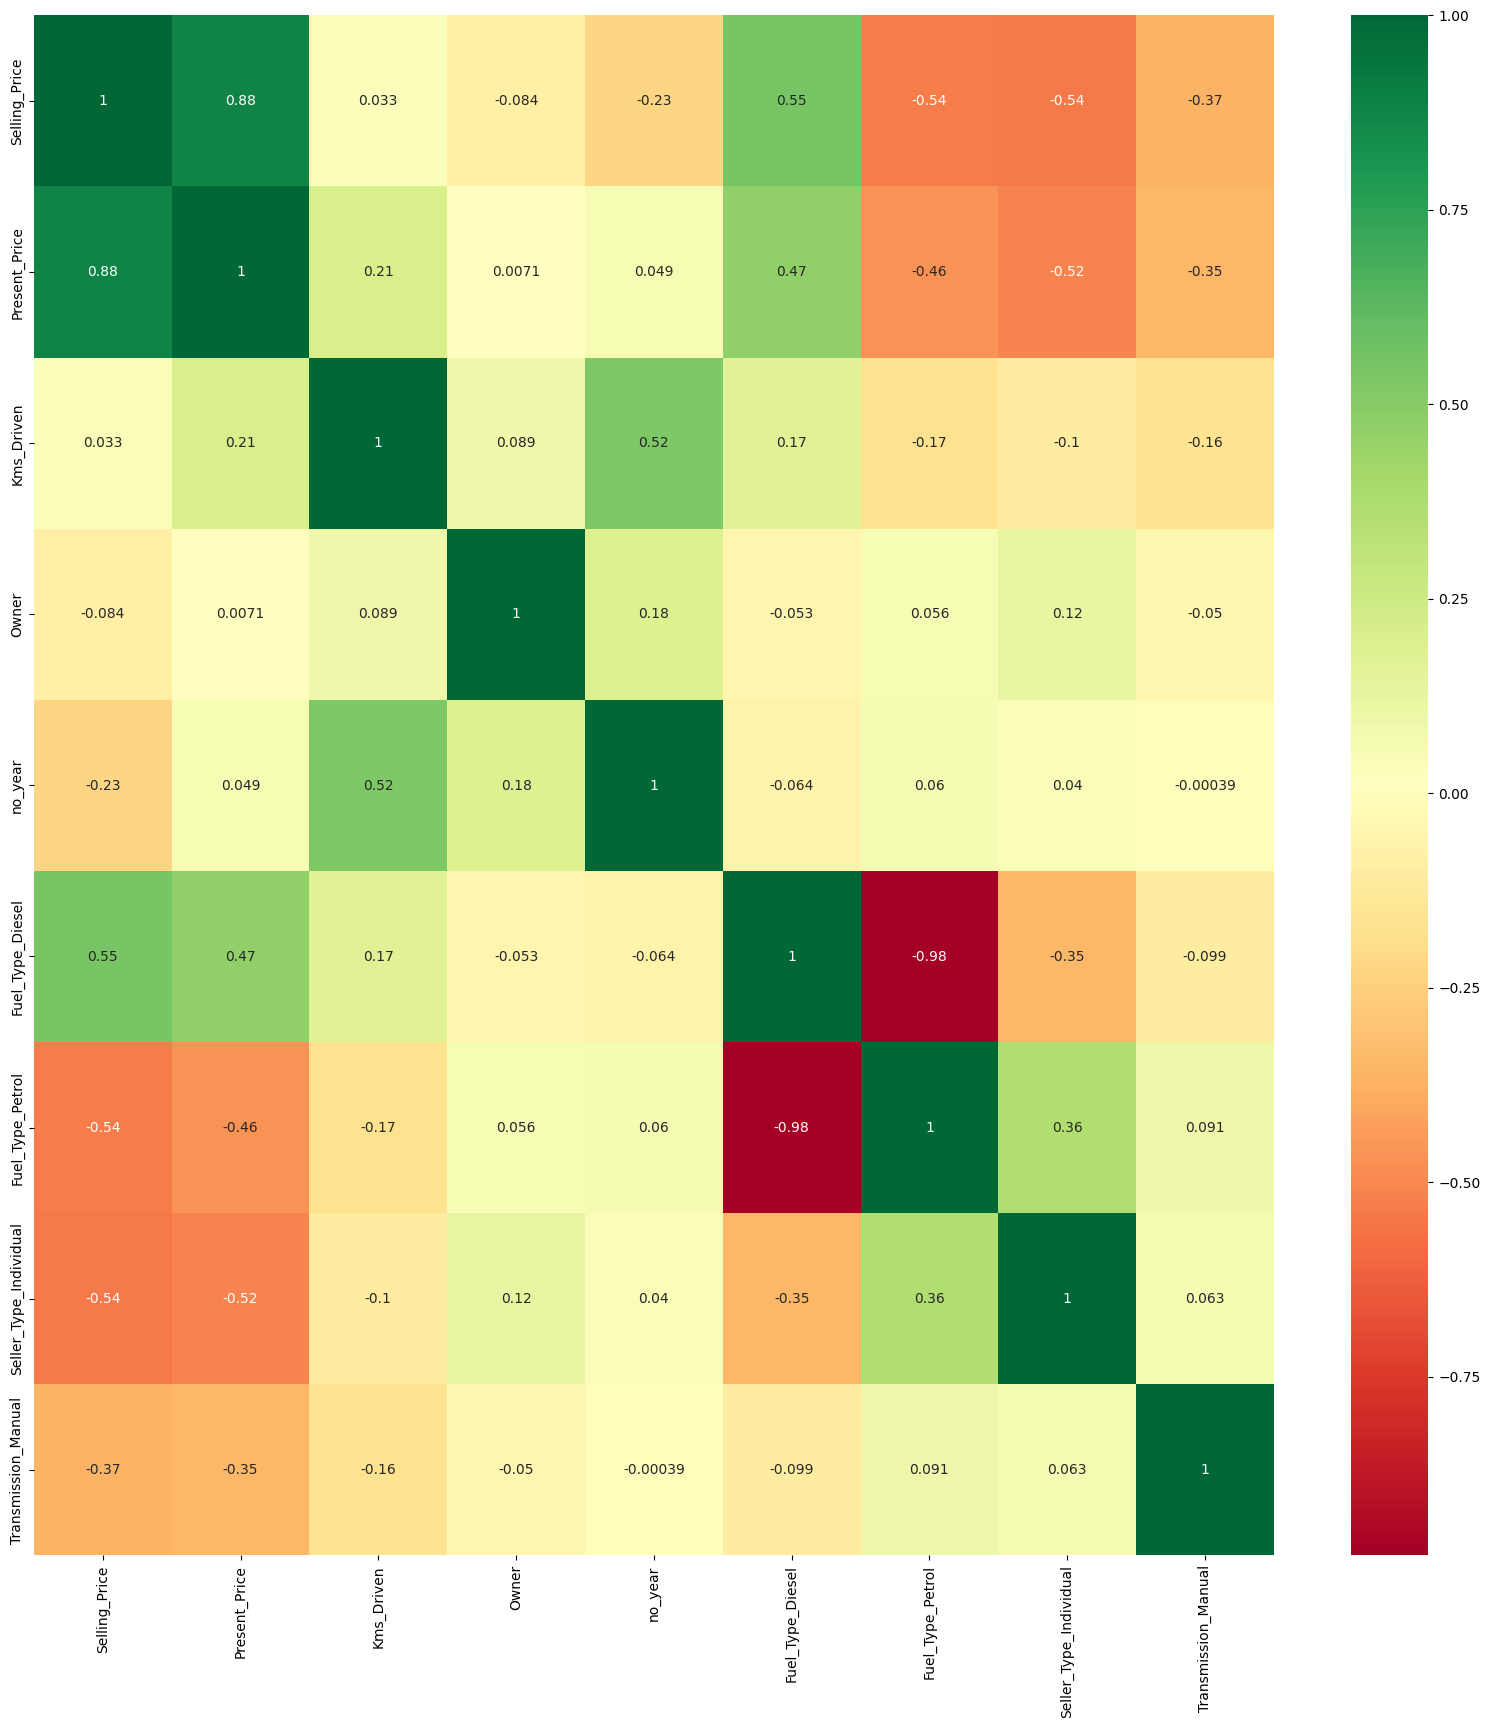

In [201]:

import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

contoh deskripsi hasil heatmap:
| Variabel A                         | Variabel B | Korelasi                                                              | Arti |
| ---------------------------------- | ---------- | --------------------------------------------------------------------- | ---- |
| `Present_Price` vs `Selling_Price` | 0.88       | Sangat kuat positif → makin mahal harga baru, makin mahal harga jual. |      |
| `no_year` vs `Selling_Price`       | -0.23      | Kuat negatif → makin tua umur mobil, makin turun harga jual.          |      |
| `Kms_Driven` vs `Selling_Price`    | 0.03       | Sangat lemah → makin banyak jarak tempuh, harga cenderung turun.    |      |


#**3. MODELLING**

Tahap terpenting dalam pembuatan model ML, yaitu pemodelan. Data yang sudah dipreprocessing akan digunakan untuk membuat sebuah model machine learning dengan menggunakan algoritma. Pada pemodelan kali ini, saya membuat model regresi dengan menggunakan algortima **Random Forest Regressor.**

In [202]:
#memisahkan fitur x dan label/target y
X=final_dataset.iloc[:,1:] #mengambil kolom pertama (index ke - 0), disimpan ke y
y=final_dataset.iloc[:,0] #mengambil semua kolom dari indeks ke-1 sampai terakhir

In [203]:
#melihat semua nilai unik yang berbeda pada kolom Owner
X['Owner'].unique()

array([0, 1, 3])

In [204]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,27000,0,6,0,1,0,1
1,9,43000,0,7,1,0,0,1
2,9,6900,0,3,0,1,0,1
3,4,5200,0,9,0,1,0,1
4,6,42450,0,6,1,0,0,1


In [205]:
y.head()

0    3
1    4
2    7
3    2
4    4
Name: Selling_Price, dtype: int64

In [206]:
### Feature Importance
#import algoritma ExtraTreesRegressor untuk Mengukur seberapa penting tiap fitur (kolom input) dalam mempengaruhi hasil prediksi (y).
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt #untuk visualisasi
model = ExtraTreesRegressor() #menyiapkan model
model.fit(X,y) #melatih model untuk menghitung seberapa besar pengaruh setiap fitur terhadap hasil prediksi dari fitur input(x) dan output(y)

ExtraTreesRegressor()

In [207]:
print(model.feature_importances_)#menampilkan angka pentingnya setiap fitur

[0.37696096 0.04483877 0.00071956 0.07775076 0.22339182 0.01012039
 0.11400992 0.15220782]


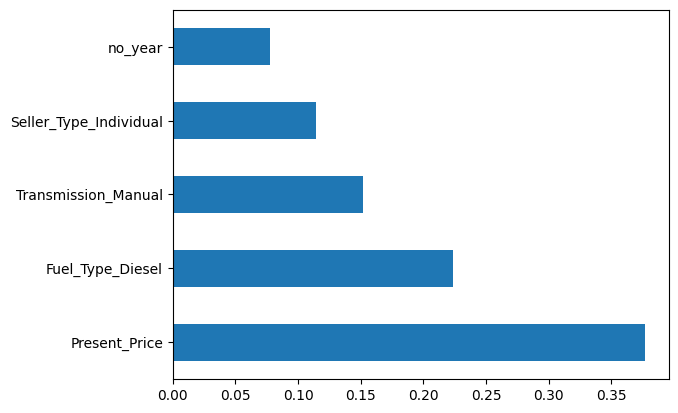

In [208]:
#menampilkan visualisasi untuk melihat fitur mana yang memiliki pengaruh besar dalam harga penjualan
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

- **Present_Price** punya pengaruh paling besar (40%) terhadap Selling_Price
- **no_year** hanya sedikit berpengaruh (10%)

In [209]:
#split data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) #data train 70% dan data test 30%

In [210]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
regressor=RandomForestRegressor()

In [212]:
#tuning hyperparameter model randomforestregressor untuk menentukan jumlah pohon (trees) yang akan digunakan model

import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] #menghasilkan 12 angka yang jaraknya sama dari 100 sampai 1200.
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [213]:
from sklearn.model_selection import RandomizedSearchCV

In [214]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Jumlah fitur (variabel) yang dipertimbangkan pada setiap pemisahan (split) dalam pohon keputusan.
max_features = ['auto', 'sqrt']
# Jumlah tingkat (level) maksimum yang boleh dimiliki oleh pohon keputusan (decision tree).
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Jumlah minimum data (sampel) yang dibutuhkan agar sebuah node (simpul) bisa dipecah menjadi dua cabang.
min_samples_split = [2, 5, 10, 15, 100]
# Jumlah minimum data (sampel) yang harus ada pada setiap leaf node (simpul daun) dalam pohon keputusan.
min_samples_leaf = [1, 2, 5, 10]


In [215]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [216]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [217]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [218]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\Users\USER\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\carprediction\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\USER\anaconda3\envs\carprediction\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_pa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [219]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

model terbaik menggunakan 1000 pohon, tiap pohon maksimal 25 level, dengan percabangan minimal 2 data per node, 1 data per daun, dan hanya menggunakan akar dari jumlah fitur saat memilih percabangan.

In [220]:
rf_random.best_score_

np.float64(-4.815324977816233)

nilai MSE yang didapat yaitu 4.1 yang berarti rata-rata kesalahan kuadratnya sekitar 4.1 (semakin kecil semakin baik).

In [221]:
predictions=rf_random.predict(X_test)

C:\Users\USER\AppData\Local\Temp\ipykernel_8912\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Selling_Price', ylabel='Density'>

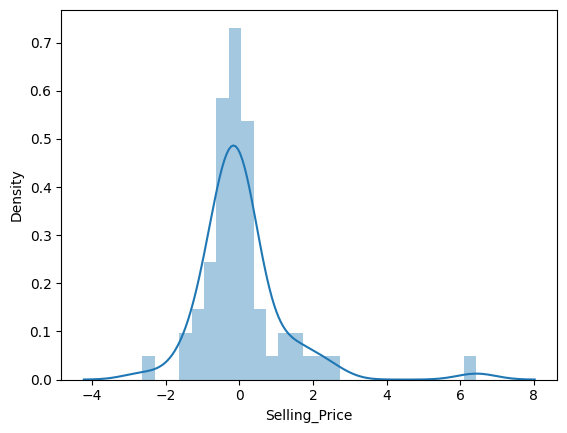

In [222]:
sns.distplot(y_test-predictions)

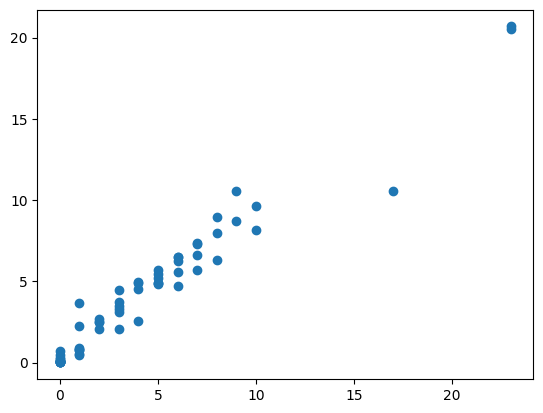

In [223]:
plt.scatter(y_test,predictions)

In [224]:
from sklearn import metrics

#**4. EVALUATION**

MAE, MSE, dan RMSE digunakan untuk evaluasi model karena ketiganya bisa mengukur seberapa jauh hasil prediksi model dari nilai sebenarnya. Alias dapat digunakan untuk mengukur tingkat kesalahan (error) dari model regresi.


* **MAE (Mean Absolute Error):**
  Mengukur rata-rata selisih antara hasil prediksi dan nilai aslinya.
  → Semakin kecil nilainya, semakin akurat model.

* **MSE (Mean Squared Error):**
  Mengukur rata-rata selisih yang dikuadratkan antara prediksi dan nilai asli.
  → Kesalahan besar akan lebih berpengaruh.

* **RMSE (Root Mean Squared Error):**
  Akar dari MSE, jadi hasilnya sama satuannya dengan data.
  → Nilai kecil berarti prediksi model makin mendekati kenyataan.



In [225]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6925983606557377
MSE: 1.4236263975409833
RMSE: 1.1931581611592754


In [226]:
import joblib
# open a file, where you ant to store the data
file = open('model_final.joblib', 'wb')

# dump information to that file
joblib.dump(rf_random, file)